1)Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

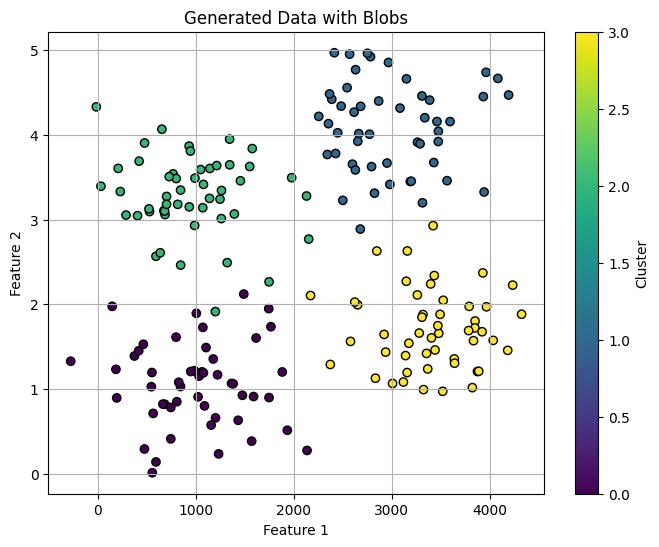

Accuracy: 0.255


In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])

X, y = make_blobs(n_samples=200, centers=blob_centers, cluster_std=0.5, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel('Особенность 1')
plt.ylabel('Особенность 2')
plt.title('Сгенерированные данные с помощью больших двоичных объектов')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X, y)

y_pred = perceptron.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Точность: {accuracy}")

2)Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.


In [ ]:
from sklearn.neural_network import MLPClassifier

accuracies = []

for num_layers in [2, 3, 10]:
    model = MLPClassifier(hidden_layer_sizes=(10,) * num_layers, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"MLPClassifier с {num_layers} точность: {accuracy}")

print("Достаточное количество скрытых слоев:")
for i, num_layers in enumerate([2, 3, 10]):
    print(f"{num_layers} скрытых слоев: {accuracies[i]} точность")

MLPClassifier with 2 hidden layers accuracy: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier with 3 hidden layers accuracy: 0.075
MLPClassifier with 10 hidden layers accuracy: 0.0125
Достаточное количество скрытых слоев:
2 скрытых слоев: 0.0 точность
3 скрытых слоев: 0.075 точность
10 скрытых слоев: 0.0125 точность


3)Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.


In [ ]:
model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=42)
model.fit(X_train, y_train)

for i, coef in enumerate(model.coefs_):
    print(f"Веса для слоя {i+1}:")
    print(coef)

print("Значения векторов смещения:")
for i, intercept in enumerate(model.intercepts_):
    print(f"Смещение для слоя {i+1}:")
    print(intercept)

Веса для слоя 1:
[[ 4.25170210e-09 -1.30973021e-02  1.17278667e-02 ... -1.38610071e-02
  -3.76689085e-03 -8.40936387e-09]
 [-3.21350558e-06 -1.29914694e-02  1.94053967e-02 ... -1.43388249e-02
  -6.83680410e-03  8.30417335e-09]
 [-2.98605451e-09 -1.45213408e-02 -2.18905974e-02 ... -1.43311853e-02
   6.95847161e-03 -2.22981089e-06]
 ...
 [-8.60749516e-09 -1.41030075e-02  2.41519287e-02 ... -1.46877216e-02
   5.20447306e-02  9.50436529e-09]
 [-3.10965405e-08 -1.42546622e-02  1.00572314e-02 ... -1.50187332e-02
   2.51948908e-02 -2.59924993e-09]
 [-9.22260668e-09 -1.30008860e-02  7.96014816e-03 ... -1.43359732e-02
  -3.31937410e-02 -1.00525904e-06]]
Веса для слоя 2:
[[-1.54287409e-06 -8.86600018e-02  5.91951493e-06  1.23331934e-01
   1.70743138e-01 -1.78951910e-03  9.18949544e-02 -3.52610461e-02
  -2.44027510e-01  1.24635927e-01]
 [-1.45237252e-01 -2.33663663e-01 -8.57723877e-03 -3.66989244e-03
  -1.80595875e-01  9.34509039e-02 -1.04791624e-03 -3.67818424e-03
  -4.76513878e-02  2.68079317e-

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


4)Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [ ]:
start_time = time.time()
big_model = MLPClassifier(hidden_layer_sizes=(100,)*10, random_state=42)
big_model.fit(X_train, y_train)
end_time = time.time()

accuracy = big_model.score(X_test, y_test)
print(f" Точность: {accuracy}")
print(f"Время обучения: {round(end_time - start_time ,3)} секунд")

 Точность: 0.4625
Время обучения: 7.97 секунд


5)Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).


In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

faces = fetch_olivetti_faces()

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=42)

perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")

Accuracy: 0.7875


6)Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [ ]:
from sklearn.metrics import mean_squared_error

faces = fetch_olivetti_faces()

X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

perceptron_regressor = Perceptron(max_iter=1000, random_state=42)
perceptron_regressor.fit(X_train, y_train)
y_pred = perceptron_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

Среднеквадратичная ошибка: 89.0625
